# Example codes for QCL regression
- Quick use

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


#import sys
#sys.path.append("regressions")
from QCLRegressor.testing.OneDimDataset import prepare_dataset,eval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


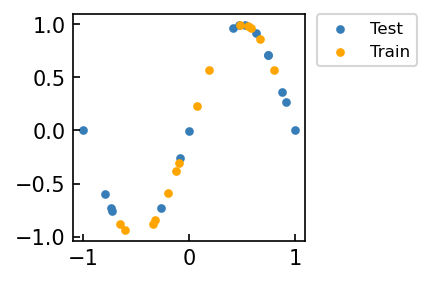

In [3]:
#prepare dataset
n=30
mode="sin"
tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y=prepare_dataset(n_all_record=n,mode=mode,plot=True)

In [4]:
#regression
from QCLRegressor.regressors.StandardQCLRegressor import StandardQCLRegressor
model=StandardQCLRegressor(n_qubit=2,x_dim=1)

model.fit(tr_X,tr_y)
model.predict(tr_X)


loss 0.030222518004915


array([-0.42878194, -0.22909898,  0.34935992, -1.04439819,  0.91108034,
       -0.65051098, -0.27823574,  0.77030363, -1.082883  ,  0.86367141,
        0.12308401,  0.90423535, -0.69260335,  0.84538983])

[0.03022251800491511,
 0.0416710376327617,
 0.5505483493909057,
 0.4185089417368542]

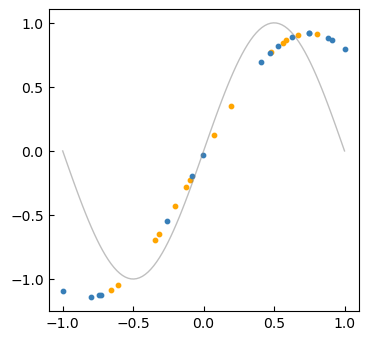

In [5]:
# show results
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)

In [6]:
# draw circuits (entanglement part)
from qulacsvis import circuit_drawer
circuit_drawer(model.vqe_gates.circuit)

           ___     ___     ___             ___     ___     ___   
          |pRX|   |pRY|   |pRX|           |pRX|   |pRY|   |pRX|  
----●-----|   |---|   |---|   |-----●-----|   |---|   |---|   |--
    |     |___|   |___|   |___|     |     |___|   |___|   |___|  
   _|_     ___     ___     ___     _|_                           
  |CX |   |pRX|   |pRY|   |pRX|   |CX |                          
--|   |---|   |---|   |---|   |---|   |--------------------------
  |___|   |___|   |___|   |___|   |___|                          


loss 0.003594138711239


[0.0035941387112392435,
 0.005219955734604846,
 0.10574035528537312,
 0.06572361533497456]

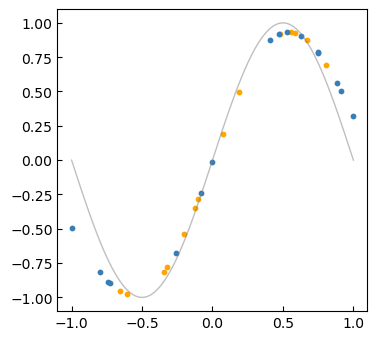

In [7]:
#change circuit configuration
from QCLRegressor.gates.CNOTRotationGates import CNOTRotationGates
from QCLRegressor.Encoders.XYEncoder import XYEncoder
from QCLRegressor.Encoders.prerocess import *

# XY encoder, entanglement with 3 depth
model=StandardQCLRegressor(x_dim=1,n_qubit=2,encoder=XYEncoder(2),vqe_gates=CNOTRotationGates(n_qubit=2,depth=3))
model.fit(tr_X,tr_y)
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)

loss 0.000712821731761


/home/kh/anaconda3/envs/qcl/lib/python3.9/site-packages/QCLRegressor/Encoders/prerocess.py:21: RuntimeWarning: invalid value encountered in arcsin
  angle_y = np.arcsin(x)
/home/kh/anaconda3/envs/qcl/lib/python3.9/site-packages/QCLRegressor/Encoders/prerocess.py:22: RuntimeWarning: invalid value encountered in arccos
  angle_z = np.arccos(x)


[0.000712821731760524,
 0.000566562949483742,
 0.03467136911233976,
 0.003415874300905064]

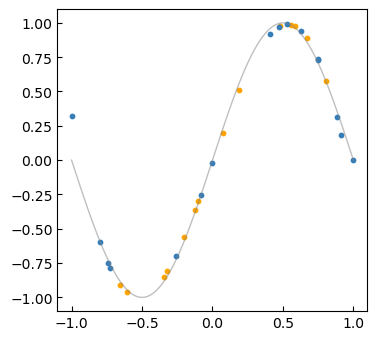

In [8]:
# XY encoder with arccos and arcsin, entanglement with 3 depth
model=StandardQCLRegressor(x_dim=1,n_qubit=2,encoder=XYEncoder(2,preprocess_func=two_arc_angles),vqe_gates=CNOTRotationGates(n_qubit=2,depth=3))
model.fit(tr_X,tr_y)
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)

loss 0.000000720923373


[7.209233731813099e-07,
 1.5119680095796801e-05,
 0.006632147175431861,
 0.00010236122155072578]

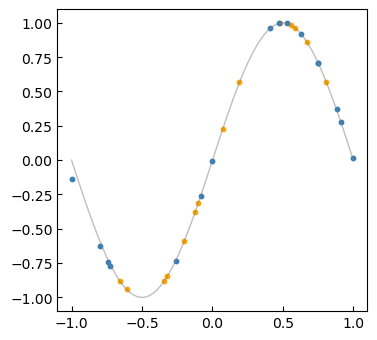

In [9]:

#change circuit configuration
from QCLRegressor.gates.CNOTRotationGates import CNOTRotationGates
from QCLRegressor.Encoders.XYEncoder import XYEncoder
from QCLRegressor.Encoders.prerocess import *

# XY encoder, entanglement with 3 depth. 4 qubits
model=StandardQCLRegressor(x_dim=1,n_qubit=4,encoder=XYEncoder(4),vqe_gates=CNOTRotationGates(n_qubit=4,depth=3))
model.fit(tr_X,tr_y)
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)